In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc("figure", dpi=150)
mpl.rc("figure", figsize=(4,4))

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'xtick.labelsize':15,
    'ytick.labelsize':15,
    'axes.labelsize':20,
})

import os

In [2]:
# extra stuff
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
import math
from scipy.spatial import cKDTree  # For finding nearest neighbors

# formatting
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Sets limits for when to use scientific notation

In [3]:
# List all files in the current directory
dir = '../data.lbm/src_8/R/'
# os.listdir(dir)

# Partícula

In [31]:
particleDf = pd.read_csv(dir+"particlesTrj.csv")
particleRadius = 1;
particleDf

,tick,time,particleId,position_x,position_y,velocity_x,velocity_y,angularVelocity
0,0,0.0,1,0.000000,-13.500000,0.000000,0.000000,0.01
1,1000,100.0,1,-0.048518,-13.477491,-0.089339,-0.101545,0.01
2,2000,200.0,1,-0.109050,-13.480985,-0.006156,-0.002341,0.01
3,3000,300.0,1,-0.157887,-13.468043,-0.000551,0.000069,0.01
4,4000,400.0,1,-0.197161,-13.473170,-0.000316,-0.000080,0.01
...,...,...,...,...,...,...,...,...
98,98000,9800.0,1,-12.541309,-13.841946,-0.001042,0.000088,0.01
99,99000,9900.0,1,-12.644015,-13.846409,-0.000973,-0.000143,0.01
100,100000,10000.0,1,-12.741381,-13.850983,-0.001046,-0.000047,0.01
101,100000,10000.0,1,-12.741381,-13.850983,-0.001046,-0.000047,0.01


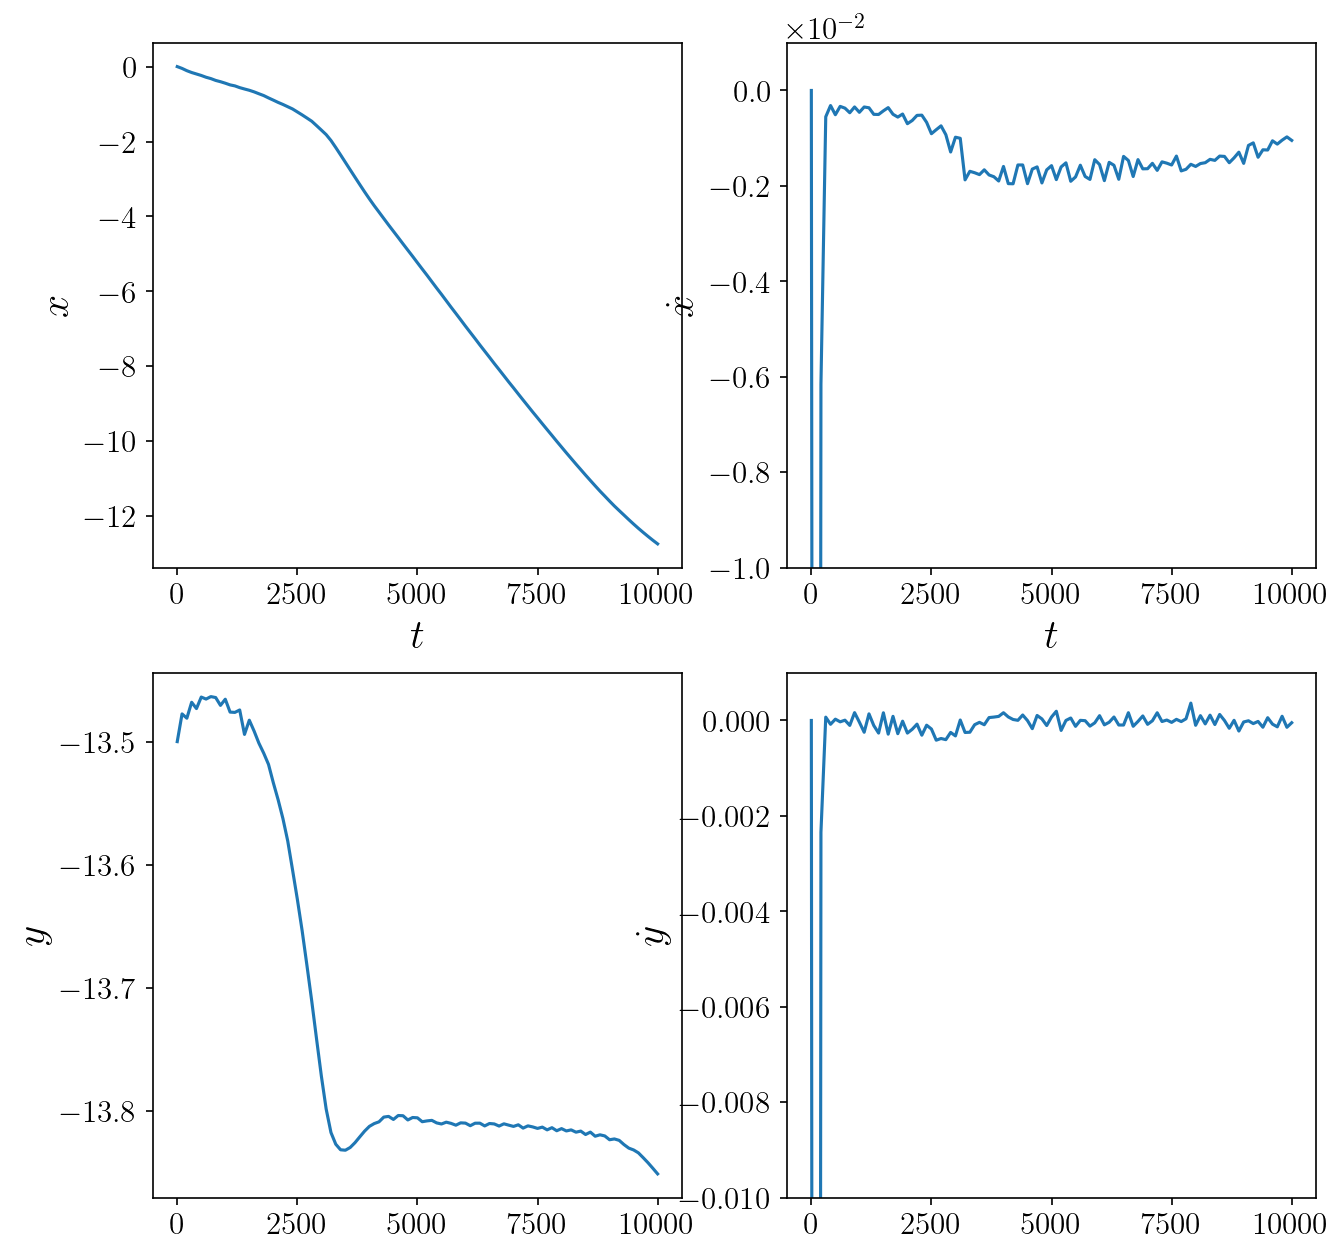

In [52]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

targetTime = 10001

axes[0,0].plot(particleDf.query(f"time < {targetTime}").time, particleDf.query(f"time < {targetTime}").position_x)
axes[0,0].set_ylabel("$x$")

axes[0,1].plot(particleDf.query(f"time < {targetTime}").time, particleDf.query(f"time < {targetTime}").velocity_x)
axes[0,1].set_ylabel("$\\dot{x}$")
axes[0,1].set_ylim(-1e-2, 1e-3)


axes[1,0].plot(particleDf.query(f"time < {targetTime}").time, particleDf.query(f"time < {targetTime}").position_y)
axes[1,0].set_ylabel("$y$")

axes[1,1].plot(particleDf.query(f"time < {targetTime}").time, particleDf.query(f"time < {targetTime}").velocity_y)
axes[1,1].set_ylabel("$\\dot{y}$")
axes[1,1].set_ylim(-1e-2, 1e-3)

for i in range(len(axes)):
    ax = axes.flatten()[i]
    ax.set_xlabel("$t$")
    ax.yaxis.set_major_formatter(formatter)

plt.show()

# Fluido

In [41]:
tick = particleDf.query("time >= 2400").tick.values[0]
particleDf.query(f"time < {targetTime}").tick
fluidDf = pd.read_csv(dir + f"fluidTrj_{tick}.csv").set_index(["id_x","id_y"]).sort_index()

fluidDf

tick    time  coordinate_x  coordinate_y  massDensity  \
id_x id_y                                                           
1    1     25000  2500.0         -15.0         -15.0          0.0   
     2     25000  2500.0         -15.0         -14.9          0.0   
     3     25000  2500.0         -15.0         -14.8          0.0   
     4     25000  2500.0         -15.0         -14.7          0.0   
     5     25000  2500.0         -15.0         -14.6          0.0   
...          ...     ...           ...           ...          ...   
301  297   25000  2500.0          15.0          14.6          0.0   
     298   25000  2500.0          15.0          14.7          0.0   
     299   25000  2500.0          15.0          14.8          0.0   
     300   25000  2500.0          15.0          14.9          0.0   
     301   25000  2500.0          15.0          15.0          0.0   

           fluidVelocity_x  fluidVelocity_y   f1   f2   f3   f4   f5   f6  \
id_x id_y                                                                   
1    1                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     2                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     3                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     4                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     5                 0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                    ...              ...  ...  ...  ...  ...  ...  ...   
301  297               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     298               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     299               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     300               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   
     301               0.0              0.0  0.0  0.0  0.0  0.0  0.0  0.0   

            f7   f8   f9  
id_x id_y                 
1    1     0.0  0.0  0.0  
     2     0.0  0.0  0.0  
     3     0.0  0.0  0.0  
     4     0.0  0.0  0.0  
     5     0.0  0.0  0.0  
...        ...  ...  ...  
301  297   0.0  0.0  0.0  
     298   0.0  0.0  0.0  
     299   0.0  0.0  0.0  
     300   0.0  0.0  0.0  
     301   0.0  0.0  0.0  

[90601 rows x 16 columns]

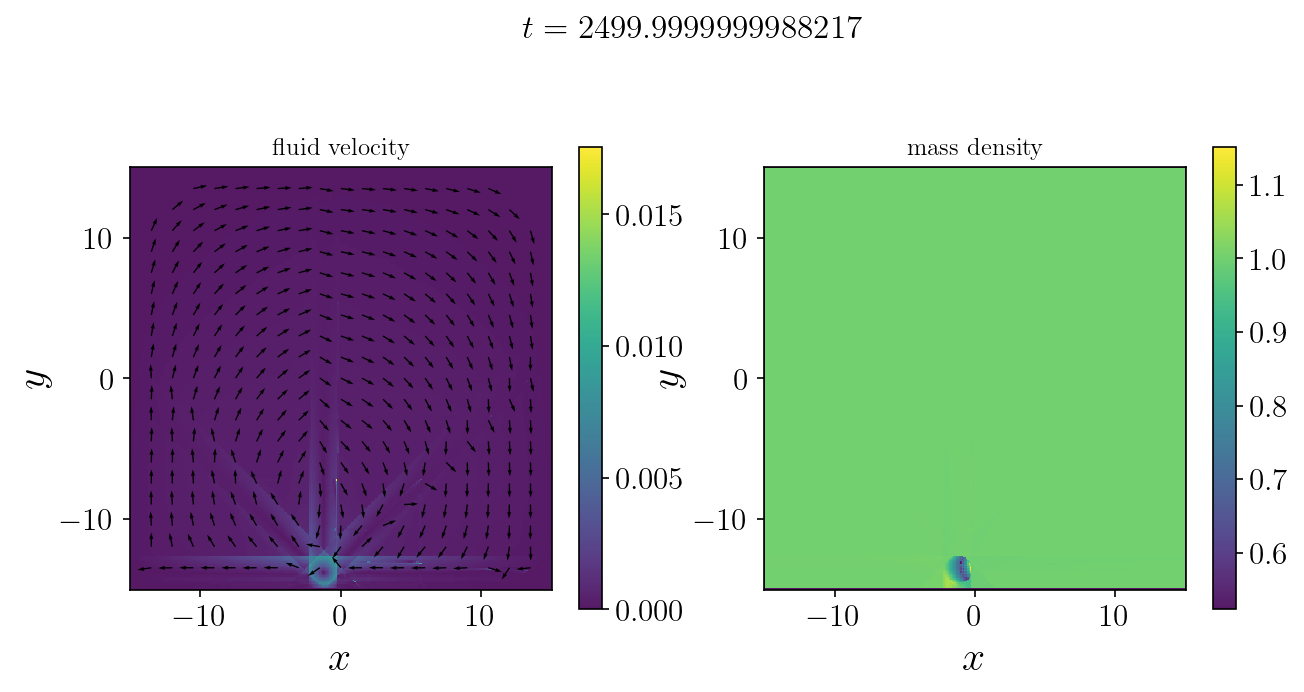

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))

# Add a title for the whole figure
fig.suptitle(f"$t = {fluidDf.time.values[0]}$", fontsize=16)

# Create a meshgrid for plotting
x_unique = fluidDf['coordinate_x'].unique()
y_unique = fluidDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

c = axes[0].pcolormesh(X, Y,
    np.sqrt(fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2).unstack().values.transpose(),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[0].set_title('fluid velocity')

maskStep = int(len(x_unique)/20)
# Create a mask for filtering
mask = (fluidDf['coordinate_x'].isin(x_unique[::maskStep])) & (fluidDf['coordinate_y'].isin(y_unique[::maskStep])) & (
    (fluidDf.fluidVelocity_x**2 + fluidDf.fluidVelocity_y**2 > 1e-10)
)
# Filter the DataFrame
filtered_df = fluidDf[mask]

axes[0].quiver(
    filtered_df['coordinate_x'], 
    filtered_df['coordinate_y'], 
    (filtered_df.fluidVelocity_x / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    (filtered_df.fluidVelocity_y / np.sqrt(filtered_df.fluidVelocity_x**2 + filtered_df.fluidVelocity_y**2)),
    scale = 30,
)

c = axes[1].pcolormesh(X,Y,
    fluidDf.massDensity.unstack().values.transpose(),
    vmin=min(fluidDf.query("massDensity > 1e-2").massDensity.values),
    cmap = "viridis", alpha = 0.9
); cs.append(c);
axes[1].set_title('mass density')

for i in range(2):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    cbar = fig.colorbar(c, ax=ax, shrink=.8)
    cbar.ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.get_offset_text().set_fontsize(10)  # Adjust the font size if necessary

plt.show()

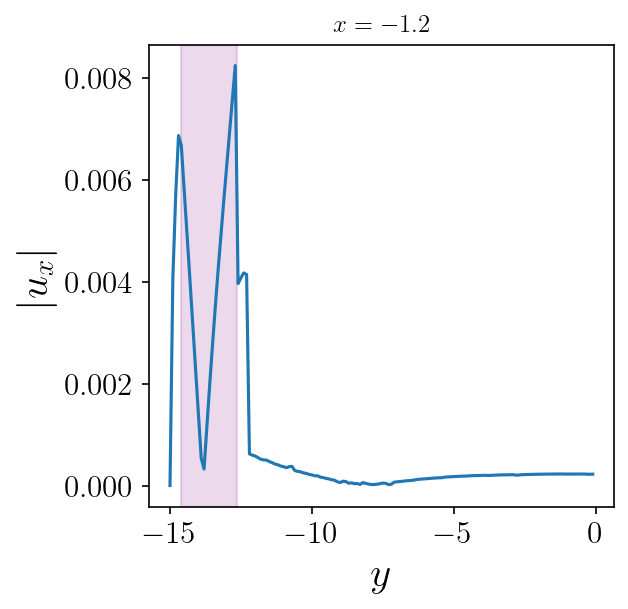

In [43]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a la posición de la partícula
position_x = particleDf.query(f'tick == {tick}').position_x.values[0]
position_y = particleDf.query(f'tick == {tick}').position_y.values[0]
id = fluidDf.query(f"coordinate_x >= {position_x}").reset_index().iloc[0].filter(["id_x"]).values[0]

# ploteo v_x(y, x = 0)
v_x = fluidDf.loc[id].filter(["coordinate_y", "fluidVelocity_x"])

wallPosition = -15

plt.plot(v_x.query('coordinate_y < 0').coordinate_y, abs(v_x.query('coordinate_y < 0').fluidVelocity_x)) 
plt.xlabel("$y$")
plt.ylabel("$|u_x|$")
plt.title(f"$x = {fluidDf.query(f"id_x == {id}").iloc[0].filter(["coordinate_x"]).values[0]}$")
# plt.axvline(wallPosition, color = "k")
plt.axvspan(position_y-particleRadius, position_y+particleRadius, color='purple', alpha=0.15)  # Shade the sphere

plt.show()

In [44]:
position_y

np.float64(-13.62796748636559)

# Tensor de estrés

In [35]:
stressDf = pd.read_csv(dir + "stressTensor.csv").set_index(["id_x","id_y"]).sort_index()

stressDf

tick     time  coordinate_x  coordinate_y  component_xx  \
id_x id_y                                                              
1    1     100010  10001.0         -15.0         -15.0          -0.0   
     2     100010  10001.0         -15.0         -14.9          -0.0   
     3     100010  10001.0         -15.0         -14.8          -0.0   
     4     100010  10001.0         -15.0         -14.7          -0.0   
     5     100010  10001.0         -15.0         -14.6          -0.0   
...           ...      ...           ...           ...           ...   
301  297   100010  10001.0          15.0          14.6          -0.0   
     298   100010  10001.0          15.0          14.7          -0.0   
     299   100010  10001.0          15.0          14.8          -0.0   
     300   100010  10001.0          15.0          14.9          -0.0   
     301   100010  10001.0          15.0          15.0          -0.0   

           component_yx  component_xy  component_yy  
id_x id_y                                            
1    1             -0.0          -0.0          -0.0  
     2             -0.0          -0.0          -0.0  
     3             -0.0          -0.0          -0.0  
     4             -0.0          -0.0          -0.0  
     5             -0.0          -0.0          -0.0  
...                 ...           ...           ...  
301  297           -0.0          -0.0          -0.0  
     298           -0.0          -0.0          -0.0  
     299           -0.0          -0.0          -0.0  
     300           -0.0          -0.0          -0.0  
     301           -0.0          -0.0          -0.0  

[90601 rows x 8 columns]

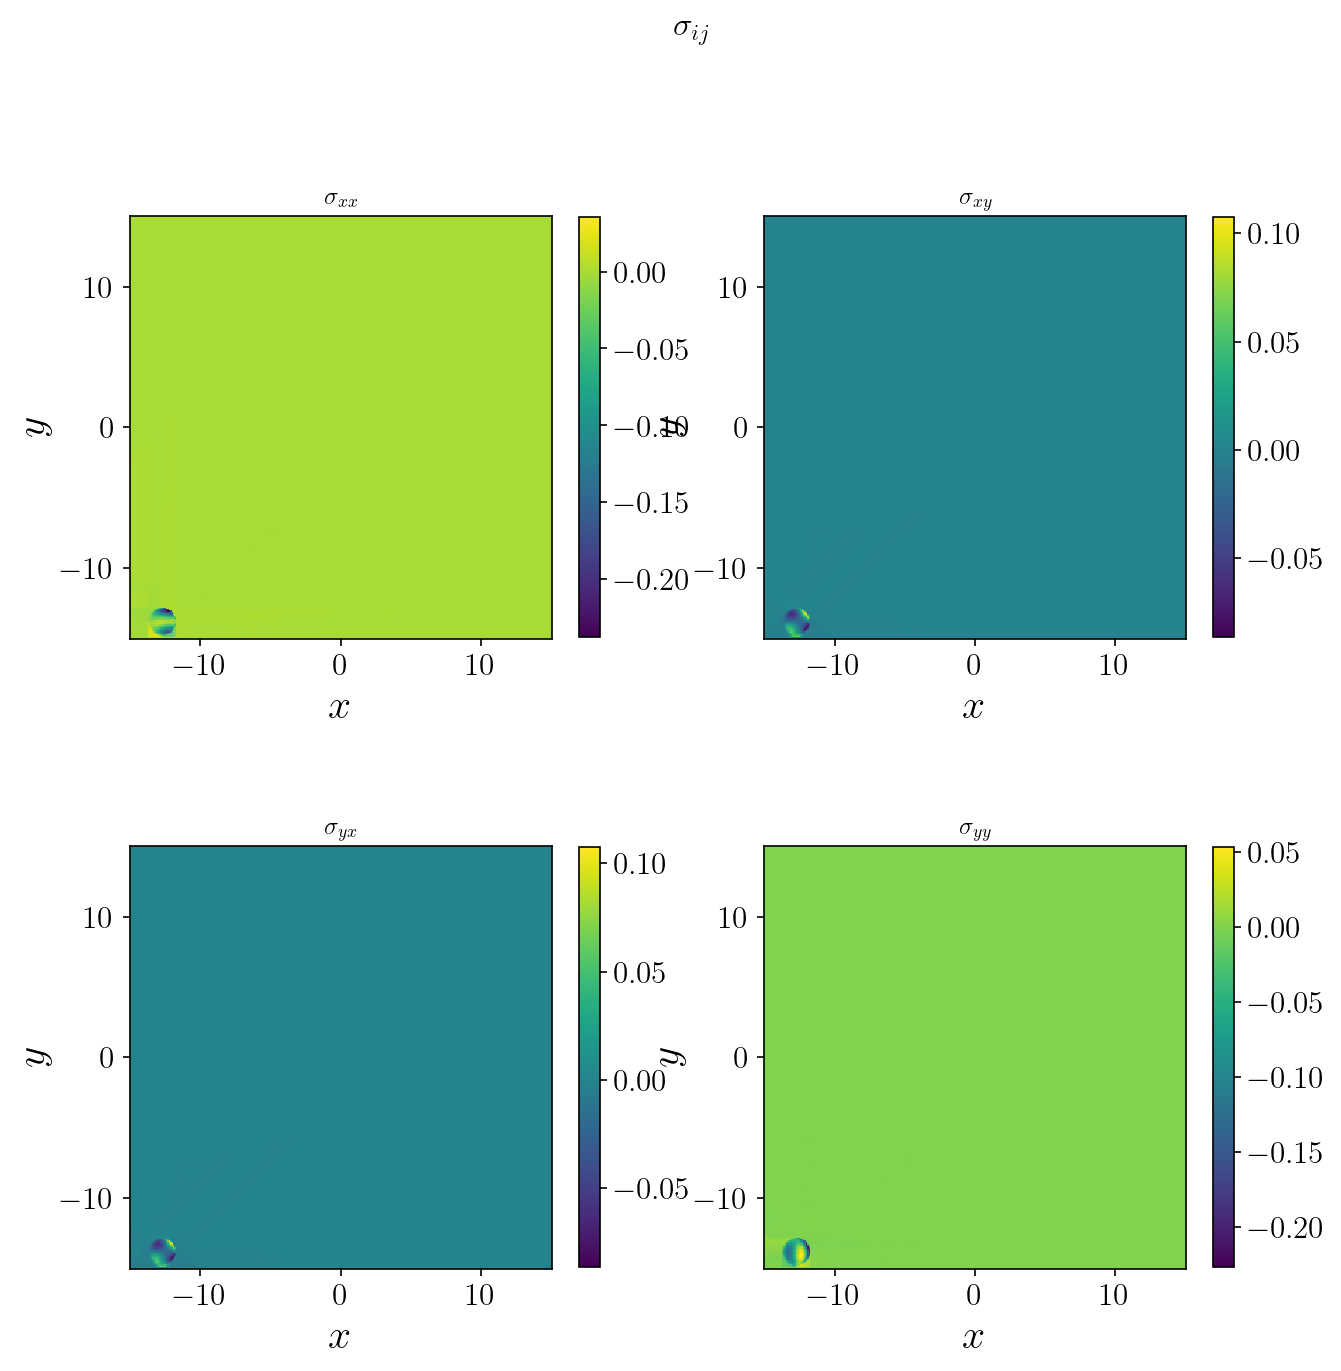

In [36]:
# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$", fontsize=16)

# Create a meshgrid for plotting
x_unique = stressDf['coordinate_x'].unique()
y_unique = stressDf['coordinate_y'].unique()
X, Y = np.meshgrid(x_unique, y_unique)

cs = []

# plotting
c = axes[0,0].pcolormesh(X,Y,stressDf["component_xx"].unstack().values.transpose()); cs.append(c);
axes[0,0].set_title("$\\sigma_{xx}$")

c = axes[0,1].pcolormesh(X,Y,stressDf["component_xy"].unstack().values.transpose()); cs.append(c);
axes[0,1].set_title("$\\sigma_{xy}$")

c = axes[1,0].pcolormesh(X,Y,stressDf["component_yx"].unstack().values.transpose()); cs.append(c);
axes[1,0].set_title("$\\sigma_{yx}$")

c = axes[1,1].pcolormesh(X,Y,stressDf["component_yy"].unstack().values.transpose()); cs.append(c);
axes[1,1].set_title("$\\sigma_{yy}$")


# for ax in axes.flat:
for i in range(4):
    ax = axes.flatten()[i]
    c = cs[i]
    ax.set_aspect('equal')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")    
    cbar = fig.colorbar(c, ax=ax, shrink=.8)
    cbar.ax.yaxis.set_major_formatter(formatter)
    cbar.ax.yaxis.get_offset_text().set_fontsize(10)  # Adjust the font size if necessary
#     ax.axhline(wallPosition, color = "k", alpha = 0.1)
#     ax.axhspan(-2, wallPosition, color='gray', alpha=0.1)  # Shade the wall

plt.show()

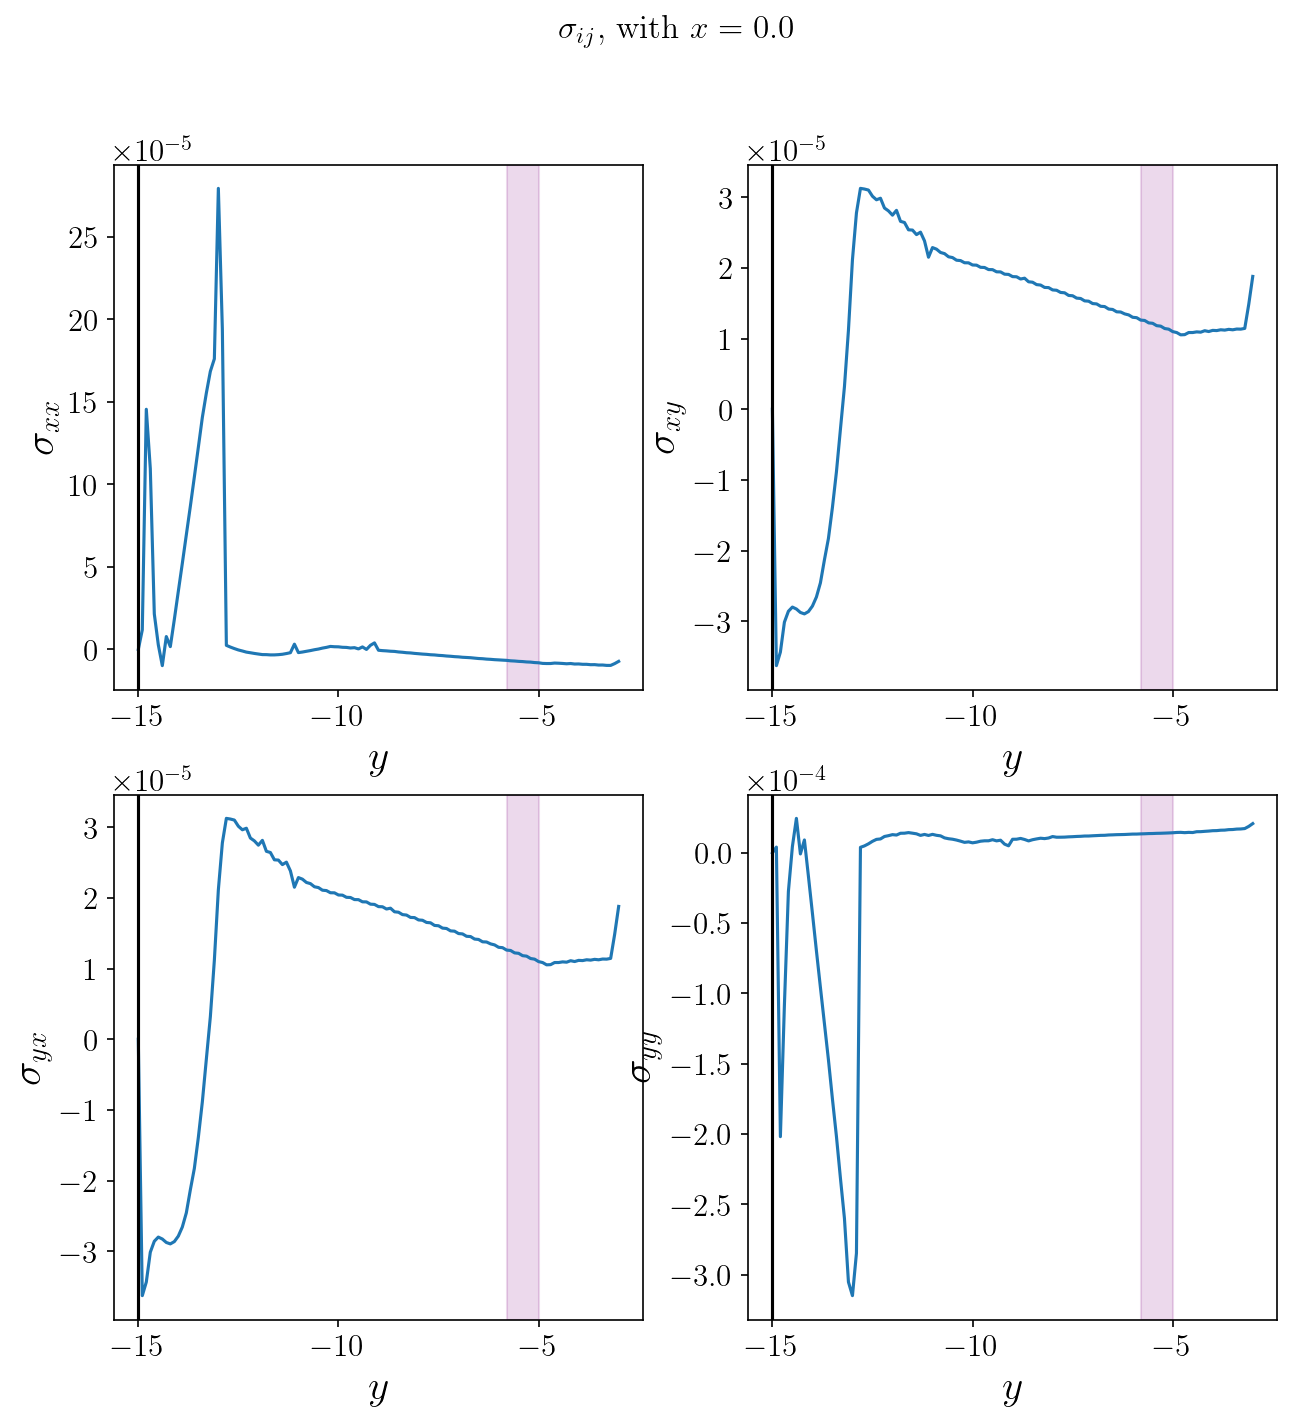

In [37]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
id = stressDf.query("coordinate_x >= 0").reset_index().iloc[0].filter(["id_x"]).values[0]

# ploteo v_x(y, x = 0)
sigma_x = stressDf.loc[id].filter(["coordinate_y", "component_xx", "component_xy", "component_yx", "component_yy"])


# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$, with " f"$x = {stressDf.query(f"id_x == {id}").iloc[0].filter(["coordinate_x"]).values[0]}$", fontsize=16)

axes[0,0].plot(sigma_x.query("coordinate_y <= -3").coordinate_y, sigma_x.query("coordinate_y <= -3").component_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(sigma_x.query("coordinate_y <= -3").coordinate_y, sigma_x.query("coordinate_y <= -3").component_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(sigma_x.query("coordinate_y <= -3").coordinate_y, sigma_x.query("coordinate_y <= -3").component_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(sigma_x.query("coordinate_y <= -3").coordinate_y, sigma_x.query("coordinate_y <= -3").component_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$y$")
    ax.yaxis.set_major_formatter(formatter)
    ax.axvline(wallPosition, color = "k")
    ax.axvspan(-6+0.2, -6+1, color='purple', alpha=0.15)  # Shade the sphere

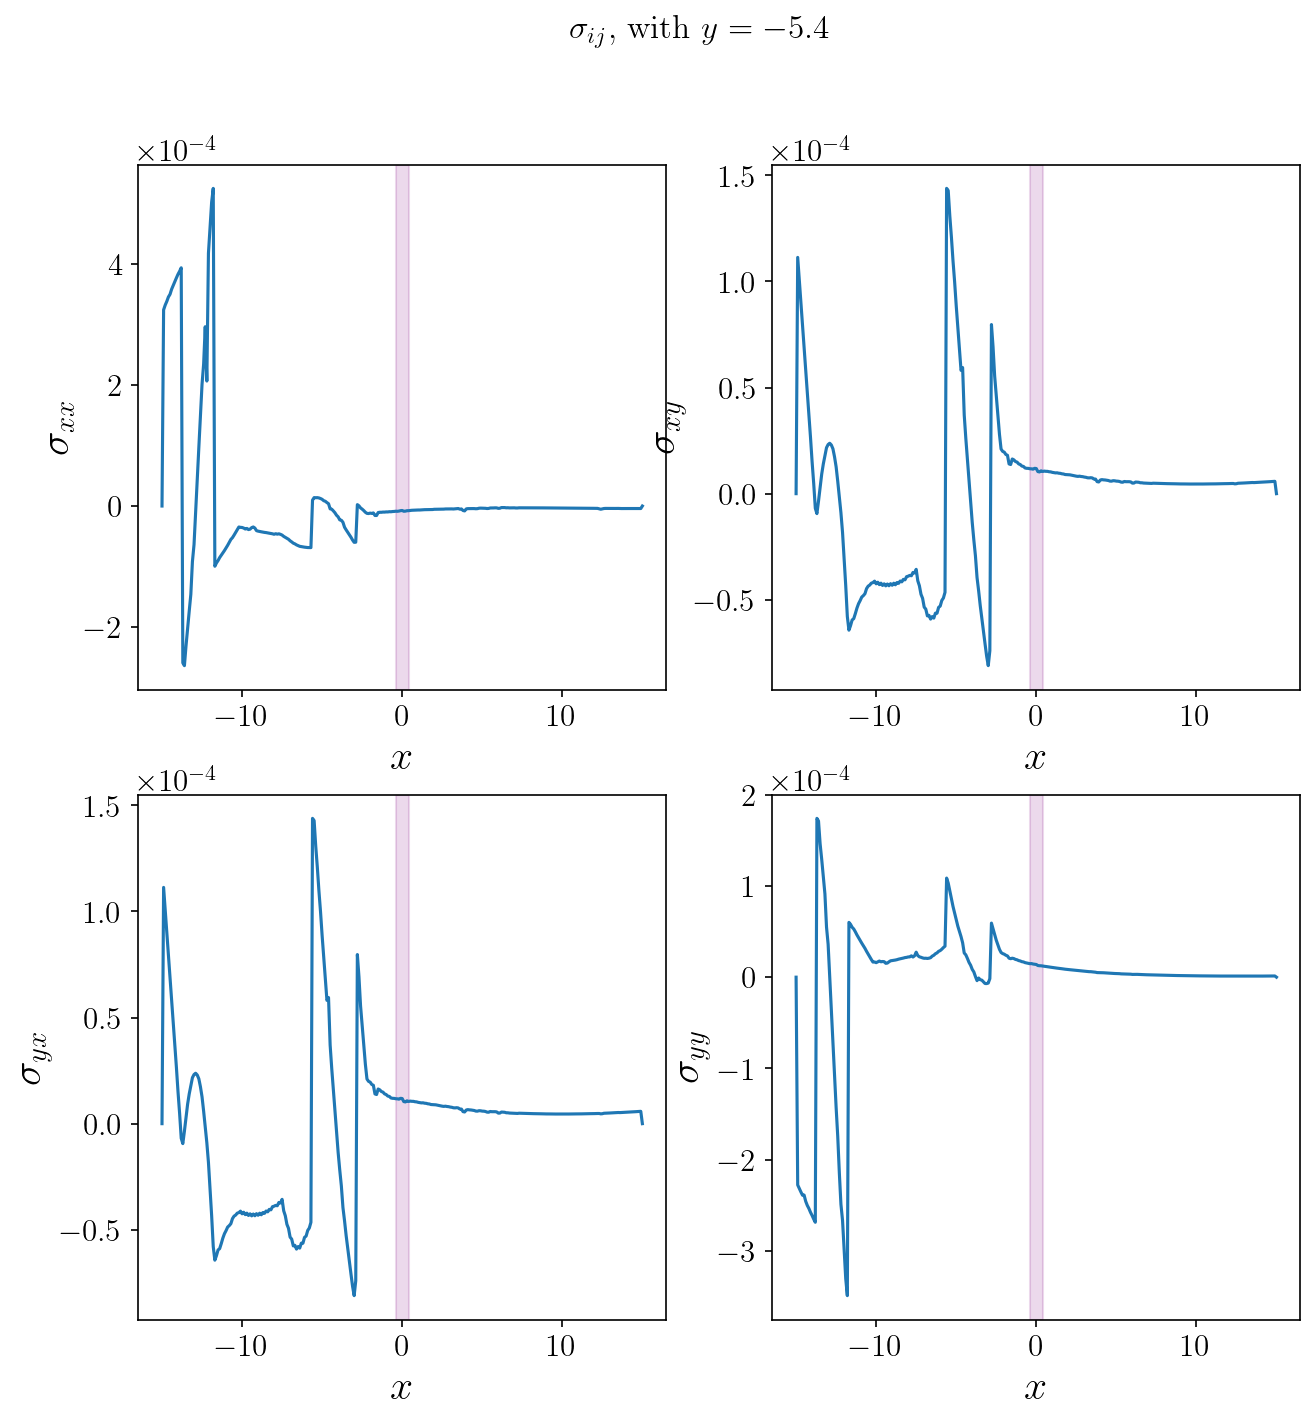

In [38]:
# encuentro el primer id_x tal que coordinate_x sea mayor o igual a cero
id = stressDf.query("coordinate_y >= -5.4").reset_index().iloc[0].filter(["id_y"]).values[0]

sigma_y = stressDf.query(f"id_y == {id}").filter(["coordinate_x", "component_xx", "component_xy", "component_yx", "component_yy"])


# setting up stuff
fig, axes = plt.subplots(2,2,figsize = (10,10))

# Add a title for the whole figure
fig.suptitle("$\\sigma_{ij}$, with " f"$y = {stressDf.query(f"id_y == {id}").iloc[0].filter(["coordinate_y"]).values[0]}$", fontsize=16)

axes[0,0].plot(sigma_y.coordinate_x, sigma_y.component_xx) 
axes[0,0].set_ylabel("$\\sigma_{xx}$")    
axes[0,1].plot(sigma_y.coordinate_x, sigma_y.component_xy) 
axes[0,1].set_ylabel("$\\sigma_{xy}$")    
axes[1,0].plot(sigma_y.coordinate_x, sigma_y.component_yx) 
axes[1,0].set_ylabel("$\\sigma_{yx}$")    
axes[1,1].plot(sigma_y.coordinate_x, sigma_y.component_yy) 
axes[1,1].set_ylabel("$\\sigma_{yy}$")    

for ax in axes.flatten():
    ax.set_xlabel("$x$")
    ax.yaxis.set_major_formatter(formatter)
    ax.axvspan(-0.4, 0.4, color='purple', alpha=0.15)  # Shade the sphere